In [44]:
# %pip install pdf2image

In [45]:
from dotenv import load_dotenv, find_dotenv; _=load_dotenv(find_dotenv())
import base64, os
from IPython.display import Image
from openai import OpenAI # type: ignore

In [46]:
client = OpenAI()

In [47]:
def chat(messages: list[dict]):
    # Convert the input messages to the required format
    formatted_messages = []
    for message in messages:
        formatted_message = {"role": message["role"], "content": []}
        if "text" in message:
            formatted_message["content"].append({"type": "text", "text": message["text"]})
        if "image" in message:
            with open(message["image"], "rb") as image_file:
                encoded_image = base64.b64encode(image_file.read()).decode("utf-8")
                formatted_message["content"].append({
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{encoded_image}"
                    }
                })
        formatted_messages.append(formatted_message)
    # for m in formatted_messages:
    #     print(m['role'])
    #     if isinstance(m['content'], list):
    #         for c in m['content']:
    #             if c['type'] == 'text':
    #                 print(c['text'])
    #     else:
    #         print(m['content'])
    # Send a request to GPT
    params = {
        "model": "gpt-4-vision-preview",
        "messages": formatted_messages,
        "max_tokens": 4096,
    }
    result = client.chat.completions.create(**params)
    return result.choices[0].message.content

In [48]:
messages = [
    {"role": "user", "text": "これはなんですか？", "image": "images/gapao.jpg"},
    {"role": "assistant", "text": "ガパオ"},
    {"role": "user", "text": "これはなんですか？", "image": "images/roast_poak.jpg"},
]
chat(messages)

'これは焼豚（チャーシュー）です。'

In [1]:
from pdf2image.pdf2image import convert_from_path
import os

def convert_pdf_to_images(pdf_path, output_dir):
    images = convert_from_path(pdf_path)
    image_paths = []
    for i, image in enumerate(images):
        image_path = os.path.join(output_dir, f"image{i}.png")
        image.save(image_path, "PNG")
        image_paths.append(image_path)
    return image_paths

folder = 'output/manual/'
os.makedirs(folder, exist_ok=True)
# paths = convert_pdf_to_images('data/ne-ubs10a.pdf', folder)

In [67]:
# from PIL import ImageFile
# from PIL import Image as PILImage
# ImageFile.LOAD_TRUNCATED_IMAGES = True

# def split_images(folder):
#     os.makedirs(folder+'_', exist_ok=True)
#     for filename in os.listdir(folder):
#         if filename.endswith(".png"):
#             img = PILImage.open(os.path.join(folder, filename))
#             width, height = img.size
#             half_width = width // 2
#             img1 = img.crop((0, 0, half_width, height))
#             img2 = img.crop((half_width, 0, width, height))
#             img1.save(os.path.join(folder+'_', filename.replace('.png', '-1.png')))
#             img2.save(os.path.join(folder+'_', filename.replace('.png', '-2.png')))
# # os.listdir('output/manual')
# split_images(folder='output/manual')

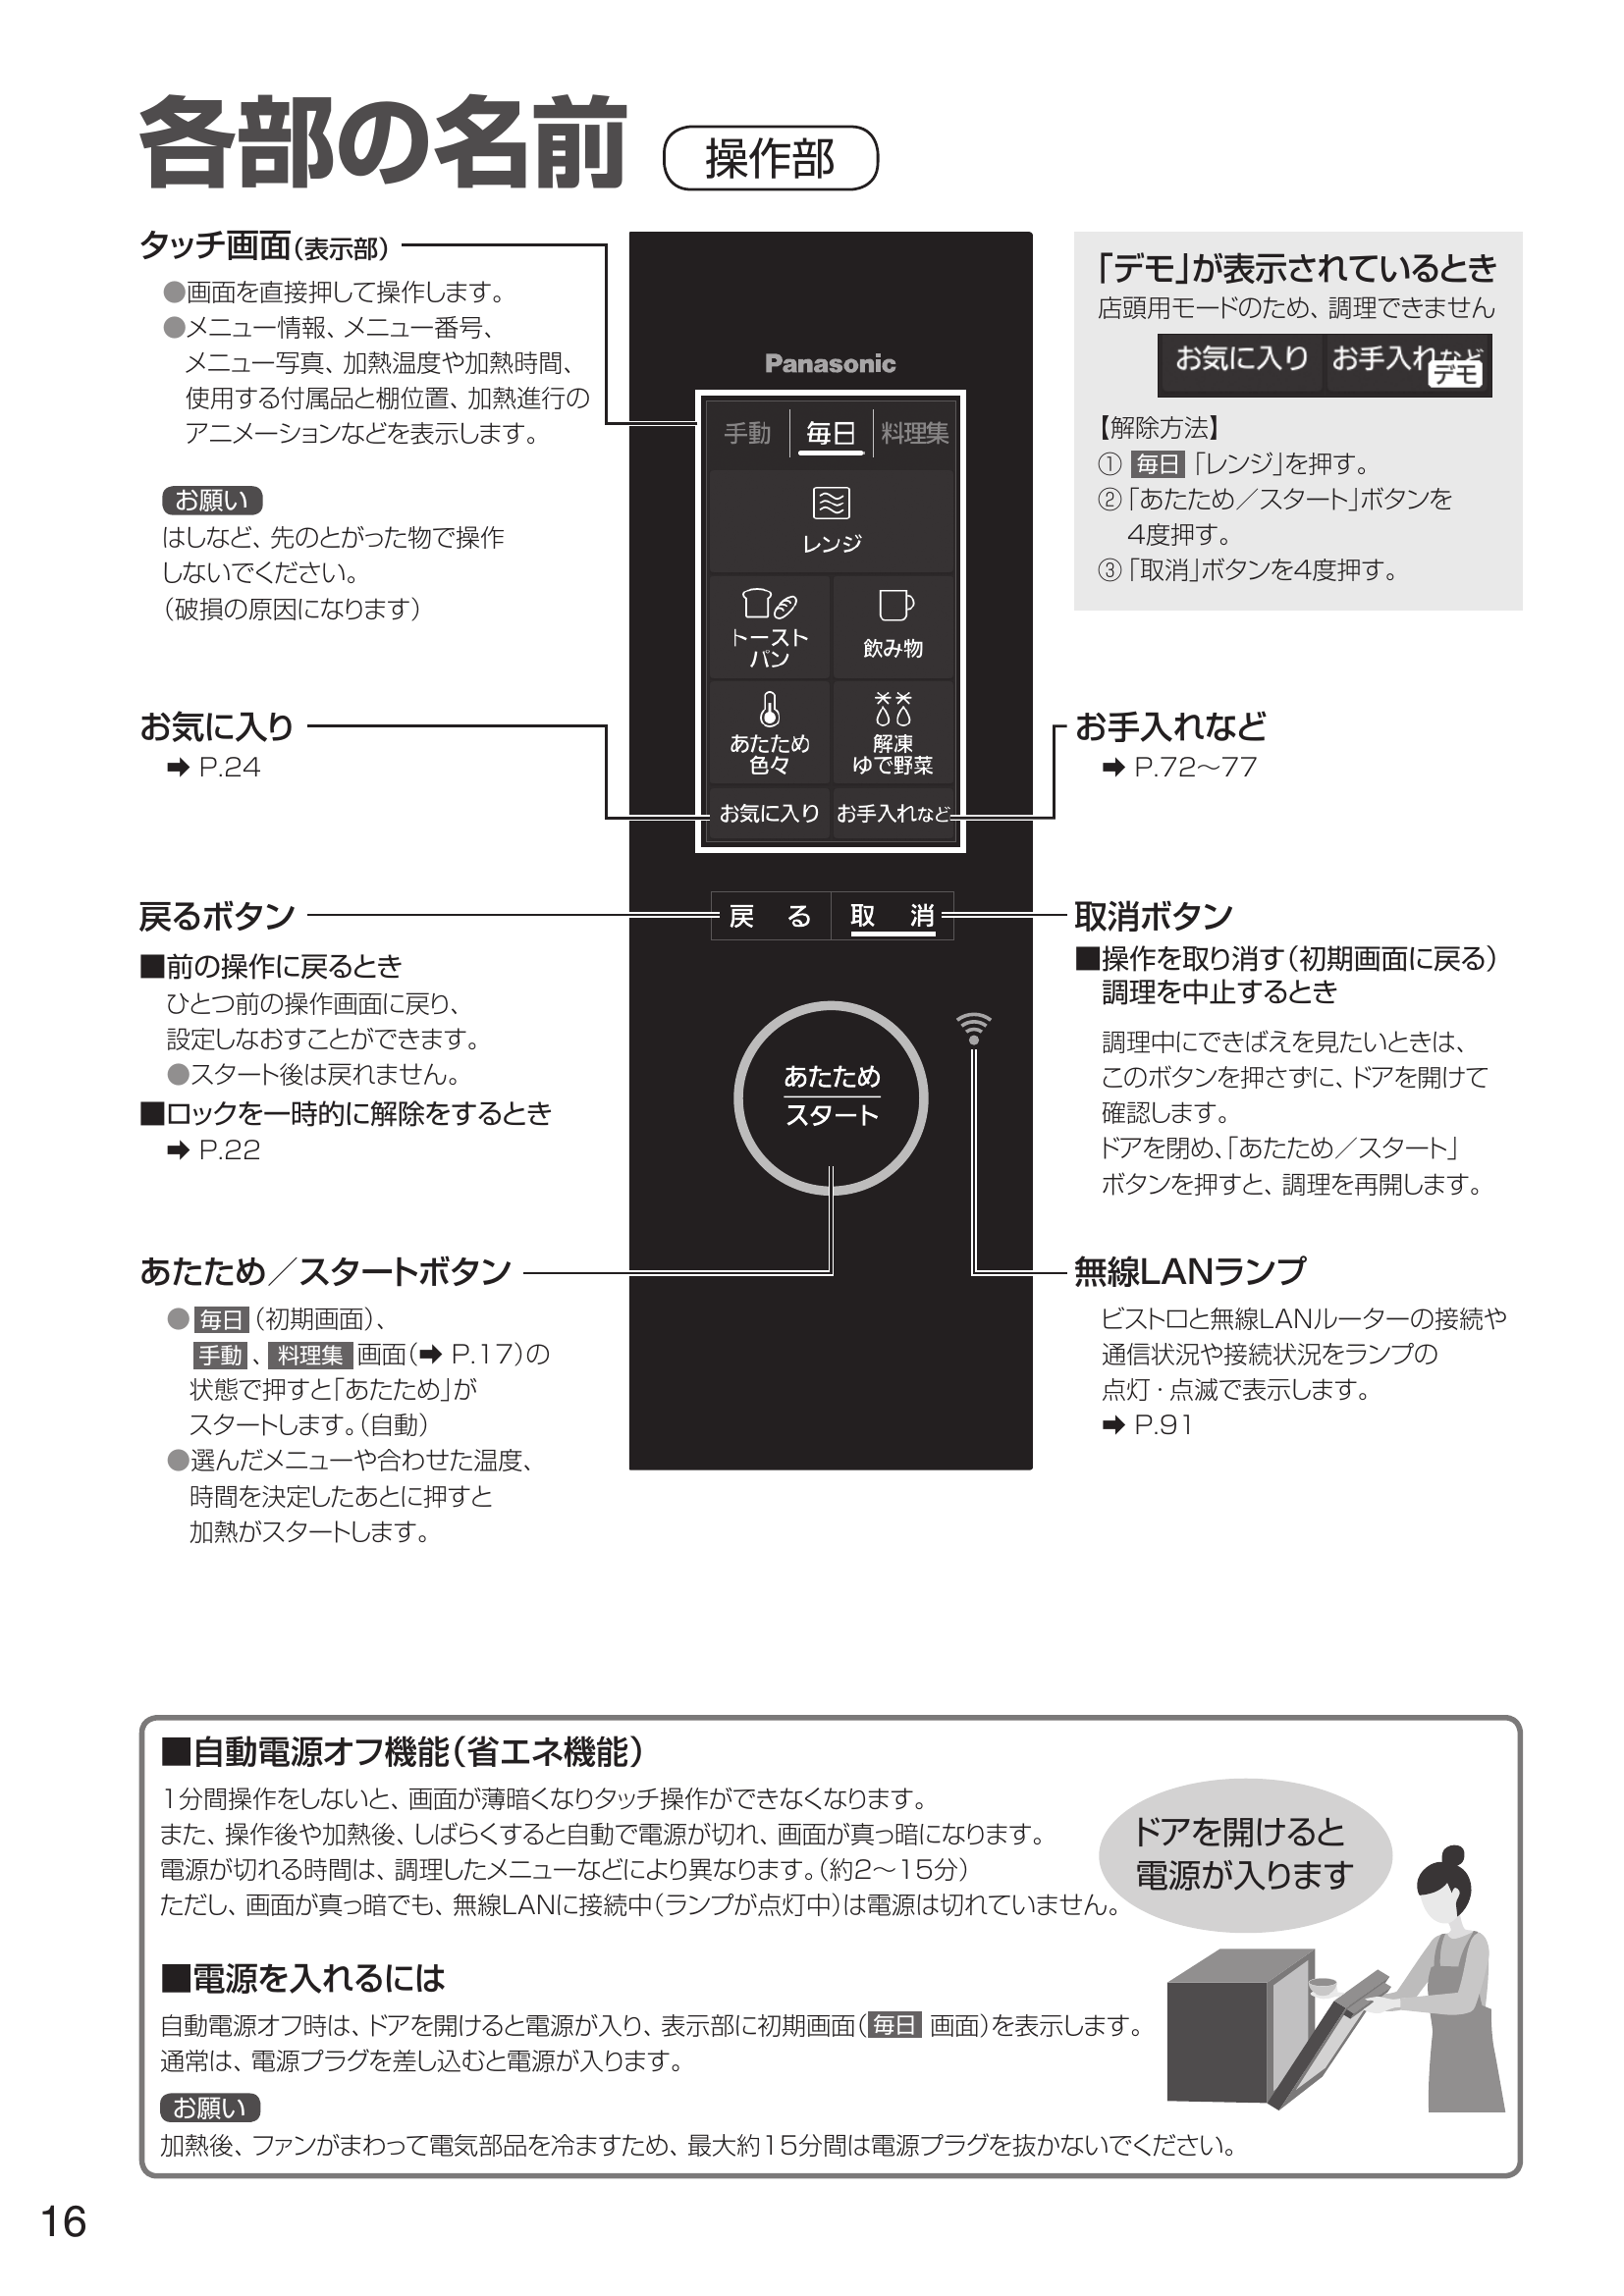

In [68]:
from IPython.display import Image
path = 'output/manual_/image8-1.png'
display(Image(path))

In [69]:
system = ''

messages = [
    {"role": "system", "text": system},
    {
        "role": "user",
        "text": "画像から読み取れる情報を箇条書きで出力してください。",
        "image": path
    },
]
print(chat(messages))

画像には次の情報が含まれています：

- 文書のタイトル：空調のご注文（選択肢）
- 右上の枠に「室内機」と表示されています。
- 左上に「タッチ面（表示部）」というラベルがあります。
- パナソニック（Panasonic）のロゴが画像の中央に表示されています。
- 機能の説明がいくつか箇条書きで提供されています。
  - 例えば「運転」、「停止」、「温度調整」、「風量」、「風向」、「おやすみ」などの項目があります。
  - 各機能には対応するシンボルがあり、その操作方法や詳細について他のページを参照しています。（例:「運転」はP.24を参照）
- 「ナノイー」を活性化させる方法として、「運転中は強力な（初期設定は弱）運転を中止すること」が挙げられています。詳細はP.17を参照。
- その他にも「スタートアップガイド」、「お手入れ」、「お手入れなど」、「安心/サポート」などのセクションに分かれた説明があります。
- 右下には「バッテリーを削除して」の手順が記載されており、それに従ってバッテリーを取り出す女性のイラストがあります。
- また、「自動的な見守り機能（ゴースト機能）」の説明もあり、決められた時間運転を続ける機能や、エアーコンディショナーを適切な状態に維持するための自動クリーン機能について言及しています。
- 画像の下部には「16」というページ番号が記されています。

文書は、恐らくエアコンのリモコンや操作パネルの使用マニュアルの一部で、操作方法や特徴を説明していると考えられます。


In [70]:
system = (
    'これから家電の取扱説明書について、ユーザの指示に従って認識結果を出力してください。'
    '取扱説明書は、グリルスチームオーブンレンジのNE-UBS-10Aという機種のものです。'
)

messages = [
    {"role": "system", "text": system},
    {
        "role": "user",
        "text": "画像から読み取れる情報を箇条書きで出力してください。",
        "image": path
    },
]
print(chat(messages))

- 製品の名称：遠赤外線テーブル（家電製品）
- パナソニックブランドの製品（Panasonicロゴが表示）
- グリル面（家庭用）
  - 図解には「使用」「温め」「調理中」と表示されるランプがある。
  - リングヒーター、遠赤外線ヒーター、庫内灯が示されている。
  - 「お知らせ」ランプが装備されている。
- 操作部の説明
  - 「手動」ボタンが表示され、「お手入れ」と関連付けられている。
  - 「自動/解凍」ボタンと「お手入れ」との関連がある。
  - 「お手入れとは」に関してはP.72～77を参照するよう指示。
- 調理ダイヤル
  - 調整を2段階で行う（初期設定に戻る）
  - 操作は「右へ回す」「取り消し」操作がある。
  - 設定や調整の詳細についてP.22を参照するよう指示。
- あたため/スタートボタン
  - 電源（初期設定）、スタートは、「レシピ」番号（参照P.17）を基に設定される。
  - ストップは、一回押す。
  - 運用モードモニターと連動していると示されている。
- 無線LANランプ
  - 家庭用無線LANルーターの接続状態を監視し、点灯・点滅するものであることが示されている。
  - P.91を参照するよう指示。
- 自動お知らせプッシュ機能（音と緑光線）
  - 1分間隔の通知機能があり、運転状態を示す。
  - ドアが閉まっていないと機能しないことが示されている。
  - 運転モードと接続している。
- 運転を乱れるには
  - 安全に関する特記事項が記載されており、ボタン操作には注意が必要。
  - 長時間、Doorを開けたままにしないよう指示。
- 注記
  - ドア開け状態で長時間放置しないこと、最大15分間は電源プラグを抜かないでください。

ページは16 pageNumberであり、日本語の取扱説明書からの抜粋であることが確認できます。
